In [2]:
# adaboost gradientboost clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

In [31]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [32]:
df.HeartDiseaseorAttack = [int(b) for b in df.HeartDiseaseorAttack]
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [33]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [34]:
df = df.astype({'HighBP': 'int', 'HighChol': 'int', 'CholCheck': 'int', 'Smoker': 'int', 'Stroke': 'int', 'Diabetes': 'int', 'PhysActivity': 'int', 'Fruits': 'int', 'Veggies': 'int', 'HvyAlcoholConsump': 'int', 'AnyHealthcare': 'int', 'NoDocbcCost': 'int', 'GenHlth': 'int', 'MentHlth': 'int', 'PhysHlth': 'int', 'DiffWalk': 'int', 'Sex': 'int', 'Age': 'int', 'Education': 'int', 'Income': 'int'})

In [35]:
df.to_csv('data/hd_2015_recast_int.csv', index=None)

In [12]:
X = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [13]:
pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=1))
])

pipe_grad = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

pipe_km = Pipeline([
    ('ss', StandardScaler()),
    ('km', KMeans(random_state=1))
])

pipe_dbs = Pipeline([
    ('ss', StandardScaler()),
    ('dbs', DBSCAN())
])

pipe_xgb = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])

In [14]:
pipe_ada.fit(X_train, y_train)

pipe_ada.score(X_train, y_train), pipe_ada.score(X_test, y_test)

(0.9073268159360874, 0.9073793755912961)

In [15]:
pipe_grad.fit(X_train, y_train)

pipe_grad.score(X_train, y_train), pipe_grad.score(X_test, y_test)

(0.908525176074845, 0.9079943235572374)

In [16]:
pipe_xgb.fit(X_train, y_train)

pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.9147902869757174, 0.9070167139703563)

## Confusion matrices

Initial = Ada minimizes false negatives which is probably the best result for which to optimize.

True positives:  727
False positives:  651
True negatives:  56796
False negatives:  5246
Accuracy:  0.9070167139703563
True pos rate/recall/sensitivity:  0.12171438138288967
False pos rate:  0.01133218444827406
True neg rate/specificity:  0.9886678155517259
Precision:  0.5275761973875182
              precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.12      0.20      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.57     63420
weighted avg       0.88      0.91      0.88     63420



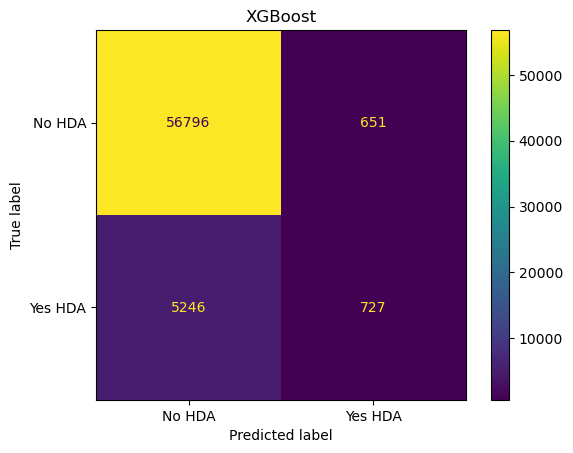

In [17]:
ConfusionMatrixDisplay.from_estimator(pipe_xgb.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('XGBoost');
predict_xgb = pipe_xgb.predict(X_test)
tp_xgb = sum((y_test == 1) & (predict_xgb == 1))
fp_xgb = sum((y_test == 0) & (predict_xgb == 1))
tn_xgb = sum((y_test == 0) & (predict_xgb == 0))
fn_xgb = sum((y_test == 1) & (predict_xgb == 0))
print('True positives: ', tp_xgb)
print('False positives: ', fp_xgb)
print('True negatives: ', tn_xgb)
print('False negatives: ', fn_xgb)

print('Accuracy: ', (tp_xgb + tn_xgb) / (tp_xgb + tn_xgb + fp_xgb + fn_xgb))
print('True pos rate/recall/sensitivity: ', tp_xgb / (tp_xgb + fn_xgb))
print('False pos rate: ', fp_xgb / (tn_xgb + fp_xgb))
print('True neg rate/specificity: ', tn_xgb / (tn_xgb + fp_xgb))
print('Precision: ', tp_xgb / (tp_xgb + fp_xgb))

from sklearn.metrics import classification_report

print(classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))

True positives:  830
False positives:  731
True negatives:  56716
False negatives:  5143


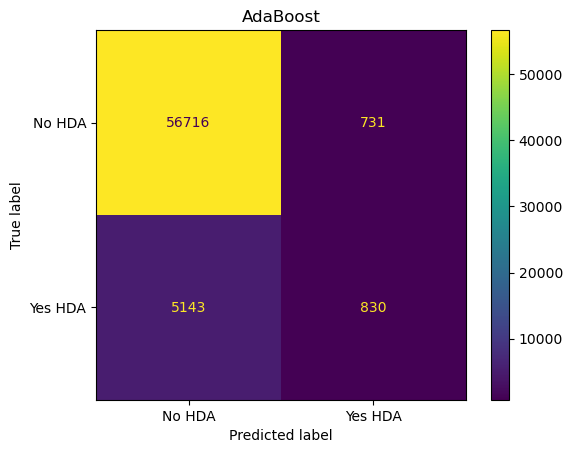

In [18]:
ConfusionMatrixDisplay.from_estimator(pipe_ada.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('AdaBoost');

predict_ada = pipe_ada.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_ada == 1)))
print('False positives: ', sum((y_test == 0) & (predict_ada == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_ada == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_ada == 0)))

True positives:  687
False positives:  549
True negatives:  56898
False negatives:  5286


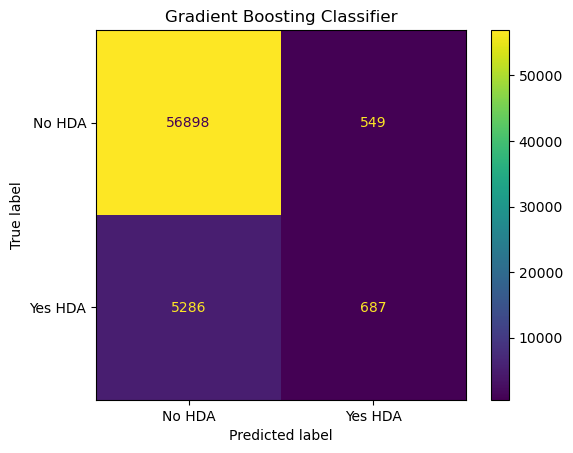

In [19]:
ConfusionMatrixDisplay.from_estimator(pipe_grad.fit(X_train, y_train), X_test, y_test, display_labels=['No HDA', 'Yes HDA'])
plt.title('Gradient Boosting Classifier');

predict_grad = pipe_grad.predict(X_test)
print('True positives: ', sum((y_test == 1) & (predict_grad == 1)))
print('False positives: ', sum((y_test == 0) & (predict_grad == 1)))
print('True negatives: ', sum((y_test == 0) & (predict_grad == 0)))
print('False negatives: ', sum((y_test == 1) & (predict_grad == 0)))

|  | XGBoost | AdaBoost | Gradient Boost |
| --- | ---: | ---: | ---: |
| True positives | 727 | 877 | 687 |
| False positives | 651 | 780 | 549 |
| True negatives | 56796 | 56667 | 56898 |
| False negatives | 5246 | 5096 | 5286 |

In [20]:
print(f'{"XGBoost" : ^50}\n\n', classification_report(y_test, predict_xgb, target_names=['No HDA', 'Yes HDA']))
print(f'{"AdaBoost" : ^50}\n\n', classification_report(y_test, predict_ada, target_names=['No HDA', 'Yes HDA']))
print(f'{"Gradient Boost" : ^50}\n\n', classification_report(y_test, predict_grad, target_names=['No HDA', 'Yes HDA']))

                     XGBoost                      

               precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.12      0.20      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.57     63420
weighted avg       0.88      0.91      0.88     63420

                     AdaBoost                     

               precision    recall  f1-score   support

      No HDA       0.92      0.99      0.95     57447
     Yes HDA       0.53      0.14      0.22      5973

    accuracy                           0.91     63420
   macro avg       0.72      0.56      0.59     63420
weighted avg       0.88      0.91      0.88     63420

                  Gradient Boost                  

               precision    recall  f1-score   support

      No HDA       0.91      0.99      0.95     57447
     Yes HDA       0.56      0.12      0.19      5973

    accuracy           

## Neural Network models

In [216]:
url = 'data/hd_2015_recast_int.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

In [217]:
X = df.drop(columns='HeartDiseaseorAttack')
y = df.HeartDiseaseorAttack

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [5]:
print(df.dtypes)
df.shape

HeartDiseaseorAttack      int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
Diabetes                  int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object


(253680, 22)

In [218]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [25]:
mms = StandardScaler()

X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

In [219]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(21, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(9, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.2))

#model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(.25))

model.add(Dense(1, activation='sigmoid'))

In [220]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [195]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,
    verbose=1
)

Epoch 1/3
   6/5946 [..............................] - ETA: 1:06 - loss: 0.6630 - accuracy: 0.7240 

2022-09-22 20:47:26.041022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5946/5946 [==============================] - ETA: 0s - loss: 0.2642 - accuracy: 0.9063

2022-09-22 20:48:17.813973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5946/5946 [==============================] - 63s 11ms/step - loss: 0.2642 - accuracy: 0.9063 - val_loss: 0.2456 - val_accuracy: 0.9080
Epoch 2/3
5946/5946 [==============================] - 60s 10ms/step - loss: 0.2438 - accuracy: 0.9074 - val_loss: 0.2424 - val_accuracy: 0.9081
Epoch 3/3
5946/5946 [==============================] - 58s 10ms/step - loss: 0.2422 - accuracy: 0.9074 - val_loss: 0.2416 - val_accuracy: 0.9083


In [78]:
#type(history)

keras.callbacks.History

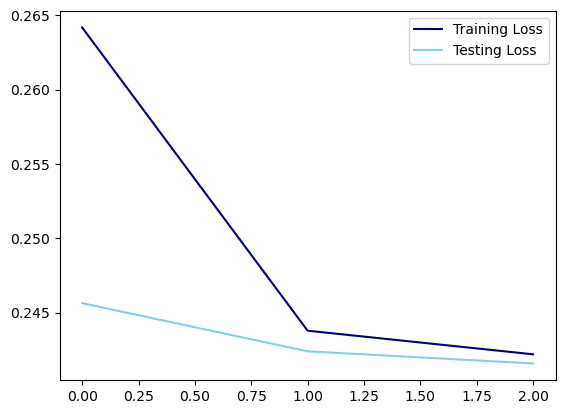

In [196]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing Loss', color='skyblue')
plt.legend();

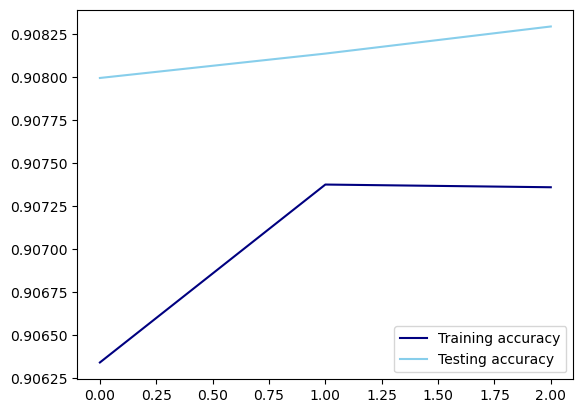

In [197]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

plt.plot(train_loss, label='Training accuracy', color='navy')
plt.plot(test_loss, label='Testing accuracy', color='skyblue')
plt.legend();

In [198]:
preds = model.predict(X_test)
#y_preds = np.argmax(preds, axis=1)

  89/1982 [>.............................] - ETA: 3s

2022-09-22 20:51:07.523669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1982/1982 [==============================] - 3s 1ms/step


In [179]:
model_score = model.evaluate(X_test, y_test)

1982/1982 [==============================] - 13s 6ms/step - loss: 0.2422 - accuracy: 0.9077


In [92]:
model_score[1]

0.9084673523902893

In [222]:
#confusion_matrix()

ConfusionMatrixDisplay.from_estimator(model_score, X=X_test, y=y_test)#preds.astype(int))#, display_labels=['No HDA', 'Yes HDA'])
plt.title('Sequential Neural Net');

#predict_nn = preds
#print('True positives: ', sum((y_test == 1) & (predict_nn == 1)))
# print('False positives: ', sum((y_test == 0) & (predict_nn == 1)))
# print('True negatives: ', sum((y_test == 0) & (predict_nn == 0)))
# print('False negatives: ', sum((y_test == 1) & (predict_nn == 0)))

ValueError: ConfusionMatrixDisplay.from_estimator only supports classifiers

In [161]:
model.history.set_params

<bound method Callback.set_params of <keras.callbacks.History object at 0x2dd32bcd0>>

In [185]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [186]:
preds

array([[0.12571786],
       [0.00873829],
       [0.3992031 ],
       ...,
       [0.05665039],
       [0.0360911 ],
       [0.00611968]], dtype=float32)